# Asteroid Size


<b>Diameter in kilometers (km)<br>

$$
diameter = 1325 \frac{ 10^{ \frac {-H} {5}}} {albedo^{0.5}}
$$
<br>
Example Absolute Values from JPL Small-Body Database Lookup<br>
    https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/ <br>
(1) Ceres      H = 3.33<br>
(2) Pallas     H = 4.12<br>
(3) Juno       H = 5.14<br>
(4) Vesta      H = 3.21<br>
(437) Rhodia   H = 10.42<br>
  

<br>
    <i> Where:</i> <br>
    <li> H is absolute value </li>
    <li> albedo value</li>
    <li>diameter in km</li> 
    <br>
Example albedos:<br>
 E.D Tedesco, Asteroids II, University of Arizona Press 1989, page 1093 and 1098<br>
(1) Ceres       0.10<br>
(2) Pallas      0.14<br>
(3) Juno        0.22<br>
(4) Vesta       0.38<br>
(437) Rhodia    0.56<br>
most others     0.04 or 4%<br>

Reference: <br>
http://neo.jpl.nasa.gov/risk/doc/palermo.pdf <br>
Quantifying the Risk Posed by Potential Earth Impacts, <br>
Steven R. Chesley, Paul W. Chodas, Andrea Milani, Giovanni B. Valsecchi, Donald K. Yeomans <br>
January 22, 2002 [Icarus 159, 423–432 (2002)] <br>
    


In [100]:
import matplotlib.pyplot as plt
from astropy import units as u

def getDiameterKm(h, albedo):
    return (1329 * 10**(-h/5) / (albedo**0.5))


"""
The range of albedos used here is the same used by CNEOS
NEO Earth Close Approaches  https://cneos.jpl.nasa.gov/ca/

Asteroid Size Estimator  
https://cneos.jpl.nasa.gov/tools/ast_size_est.html
References
E. Bowell et al. (1989) in “Asteroids II”, pp. 524-556.
A. Harris and A. Harris (1997) Icarus 126:450-454.
"""
def getAsteroidDiameterRange(h):
    albedo_max = 0.25
    albedo_min = 0.05
    dmin = getDiameterKm(h, albedo_max)
    dmax = getDiameterKm(h, albedo_min)
    #print(dmin, dmax)
    return (dmin, dmax)

    


In [106]:
#abolute magnitude H 
# use this cell to enter your own values
h = 13

#geometric albedo 
albedo = 0.25

print('h', h)
print('albedo:', albedo)
print('diameter: ', diameter)

diameterkm = (1329 * 10**(-h/5) / (albedo**0.5))
print('diameterkm = ', diameterkm)

# in astropy units
diameterwithunits  = (1329 * 10**(-h/5) / (albedo**0.5))*u.km

print('diameter with units km', diameterwithunits)
#converting to other astropy import units units
print('diameter with units meters', diameterwithunits.to(u.meter))
print('diameter with units cm', diameterwithunits.to(u.cm))



h 13
albedo: 0.25
diameter:  6.676594134952462 km
diameterkm =  6.676594134952462
diameter with units km 6.676594134952462 km
diameter with units meters 6676.594134952462 m
diameter with units cm 667659.4134952462 cm


In [107]:
#various expressions 
diameterkm = (1329 * 10**(-h/5) / (albedo**0.5))
print('diameterkm', diameterkm)

diametermeter= 1000* (1329 * 10**(-h/5) / (albedo**0.5))
print('diametermeter', diametermeter)

diameter = getDiameter(h, albedo)
print('diameter', diameter)

dmin, dmax = getAsteroidDiameterRange(h)
print('Range: min', dmin, 'max', dmax)

diameterkm 6.676594134952462
diametermeter 6676.594134952462
diameter 6.676594134952462 km
Range: min 6.676594134952462 max 14.929318343930111


Another equivalent expression for diameter d in km as a function of absolute magnitude H and geometric albedo a is given by the following equation.
$$
d = 10^{ 3.1236 - 0.5 log10(a) - 0.2H }
$$



In [118]:
import math
H=21
a = 0.04
d=math.pow(10,3.1236 -0.5 *math.log10(a) - 0.2*H)
print('H', H)
print('abedo',a)
print('diameter (km)', d)

diameterkm = (1329 * 10**(-H/5) / (a**0.5))
print('diameterkm', diameterkm)

H 21
abedo 0.04
diameter (km) 0.41934358562408197
diameterkm 0.41927115540708815


## Asteroid diameters in kilometers simple plot

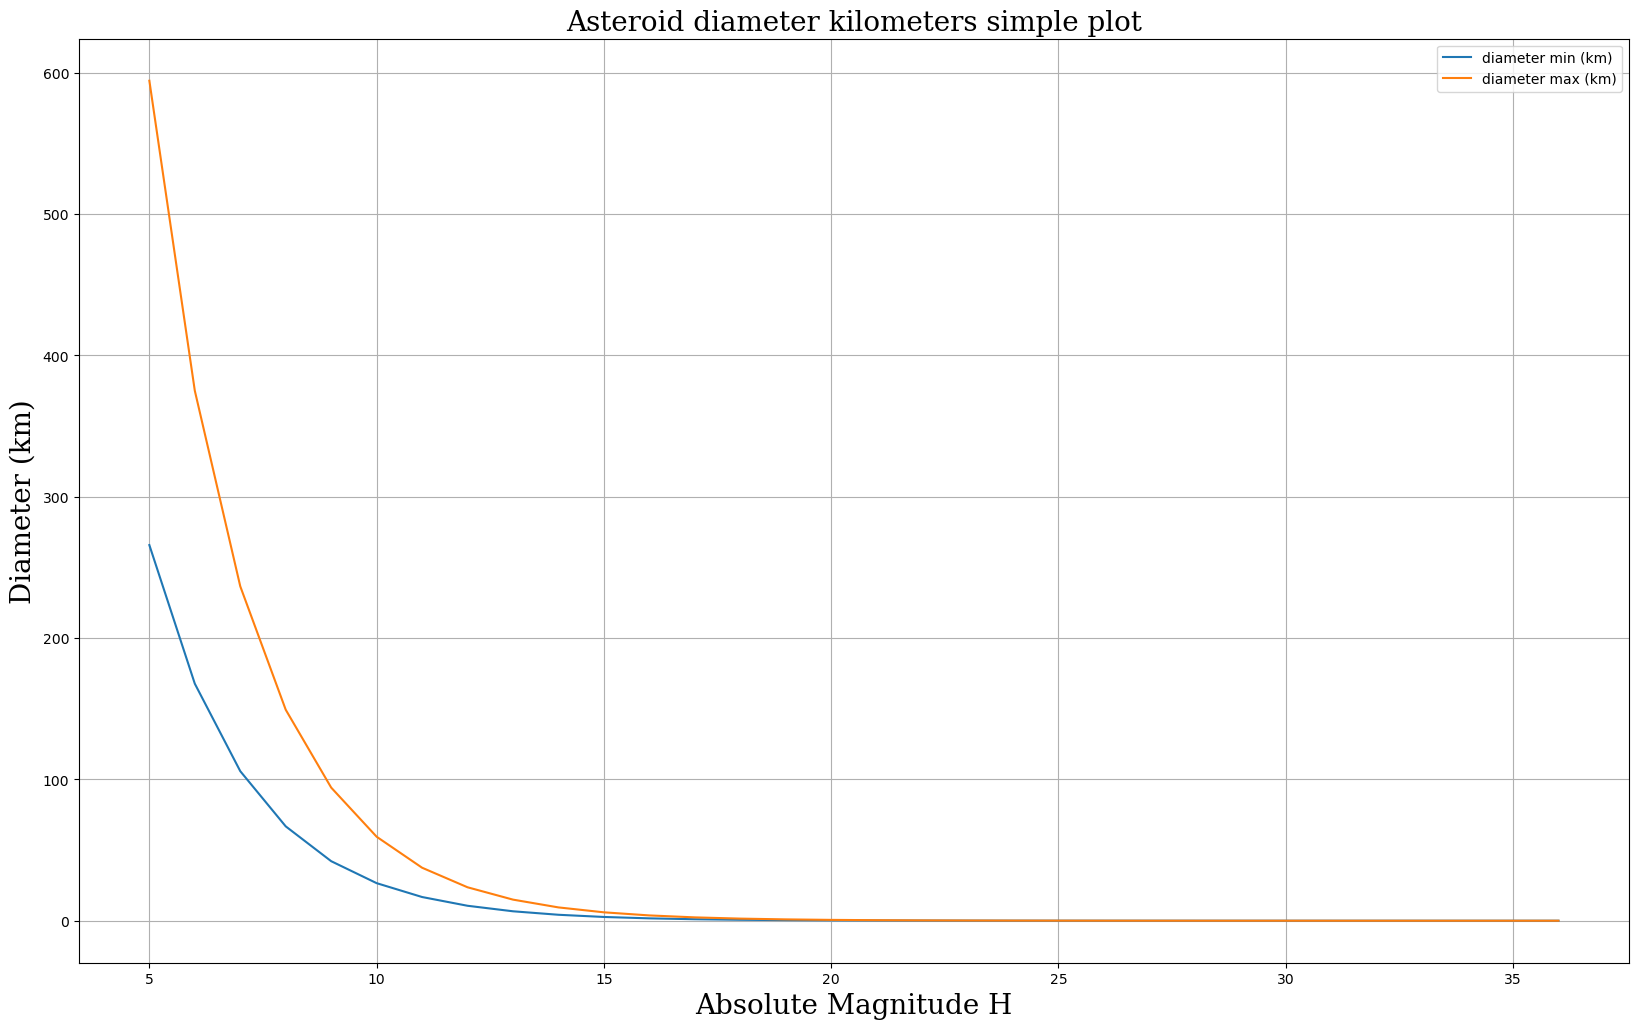

In [120]:

font1 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

boxprops = dict(boxstyle='round', facecolor='#ffffff', ec='#CCCCCC', alpha=0.9)

title='Asteroid diameter kilometers simple plot'
hmin = 5
hmax = 37
hvals = []
dminvals=[]
dmaxvals=[]
for h in range(hmin, hmax, 1):
    diam_min, diam_max = getAsteroidDiameterRange(h)
    hvals.append(h)
    dminvals.append(diam_min)
    dmaxvals.append(diam_max)
fig, ax = plt.subplots(figsize=(20, 12))
ax.grid()
ax.set_title(title, fontdict=font1)
plt.xlabel('Absolute Magnitude H', fontdict=font1)
plt.ylabel('Diameter (km)', fontdict=font1)
plt.plot(hvals, dminvals, label='diameter min (km)')
plt.plot(hvals, dmaxvals, label='diameter max (km)')
ax.legend(loc=0)
plt.show()




## Asteroid diameters in meters semilog plot

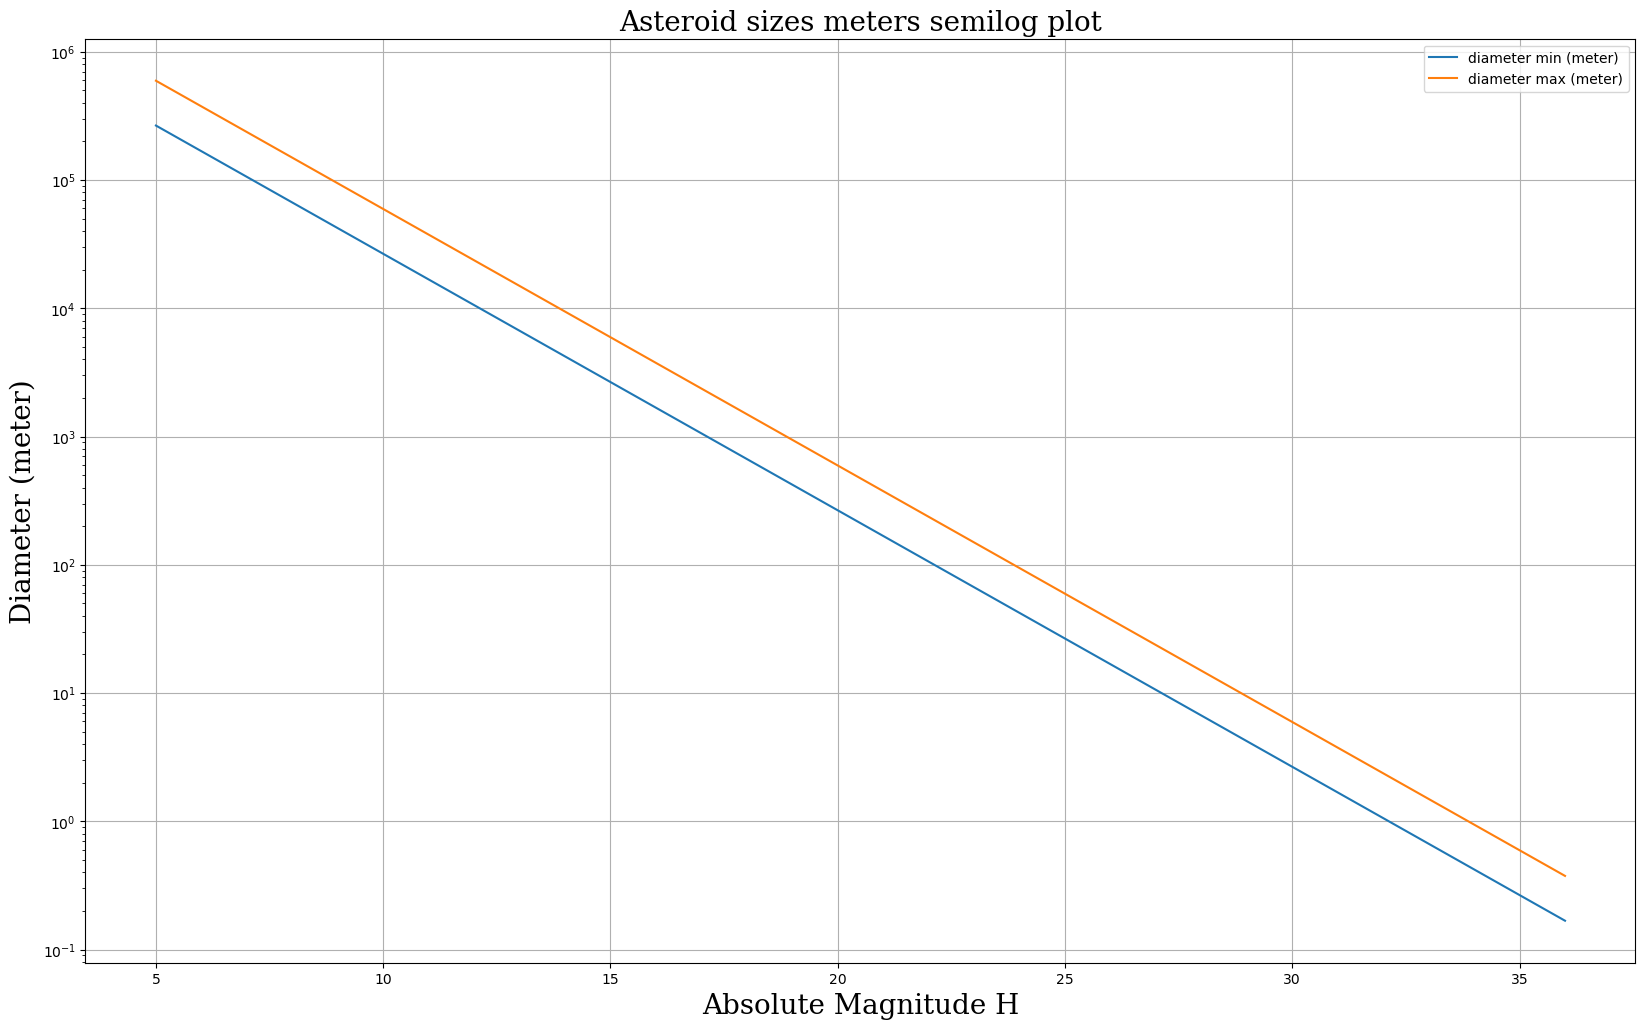

In [117]:
title='Asteroid diameters in meters semilog plot'
hmin = 5
hmax = 37
hvals = []
dminvals=[]
dmaxvals=[]
for h in range(hmin, hmax, 1):
    diam_min, diam_max = getAsteroidDiameterRange(h)
    hvals.append(h)
    dminvals.append(1000*diam_min)
    dmaxvals.append(1000*diam_max)
fig, ax = plt.subplots(figsize=(20, 12))
ax.grid()
ax.set_title(title, fontdict=font1)
plt.xlabel('Absolute Magnitude H', fontdict=font1)
plt.ylabel('Diameter (meter)', fontdict=font1)
ax.set_yscale("log", nonpositive='clip')
plt.plot(hvals, dminvals, label='diameter min (meter)')
plt.plot(hvals, dmaxvals, label='diameter max (meter)')
ax.legend(loc=0)
plt.show()

In [126]:
# (1) Ceres      H = 3.33 
# (2) Pallas     H = 4.12 
# (3) Juno       H = 5.14 
# (4) Vesta      H = 3.21 
# (437) Rhodia   H = 10.42

# (1) Ceres       0.10 
# (2) Pallas      0.14 
# (3) Juno        0.22 
# (4) Vesta       0.38 
# (437) Rhodia    0.56 
# most others     0.04 or 4%<br>

ceres={'name':'Ceres',
       'H': 3.33,
       'albedo':0.10}
pallas={'name':'Pallas',
       'H': 4.12,
       'albedo':0.14}
juno={'name':'Juno',
       'H': 5.14,
       'albedo':0.22}
vesta={'name':'Vesta',
       'H': 3.21,
       'albedo':0.38}
rhodia={'name':'Rhodia',
       'H': 10.42,
       'albedo':0.56}
    
asteroids=[]
asteroids.append(ceres)
asteroids.append(pallas)
asteroids.append(juno)
asteroids.append(vesta)
asteroids.append(rhodia)
print(asteroids)


[{'name': 'Ceres', 'H': 3.33, 'albedo': 0.1}, {'name': 'Pallas', 'H': 4.12, 'albedo': 0.14}, {'name': 'Juno', 'H': 5.14, 'albedo': 0.22}, {'name': 'Vesta', 'H': 3.21, 'albedo': 0.38}, {'name': 'Rhodia', 'H': 10.42, 'albedo': 0.56}]


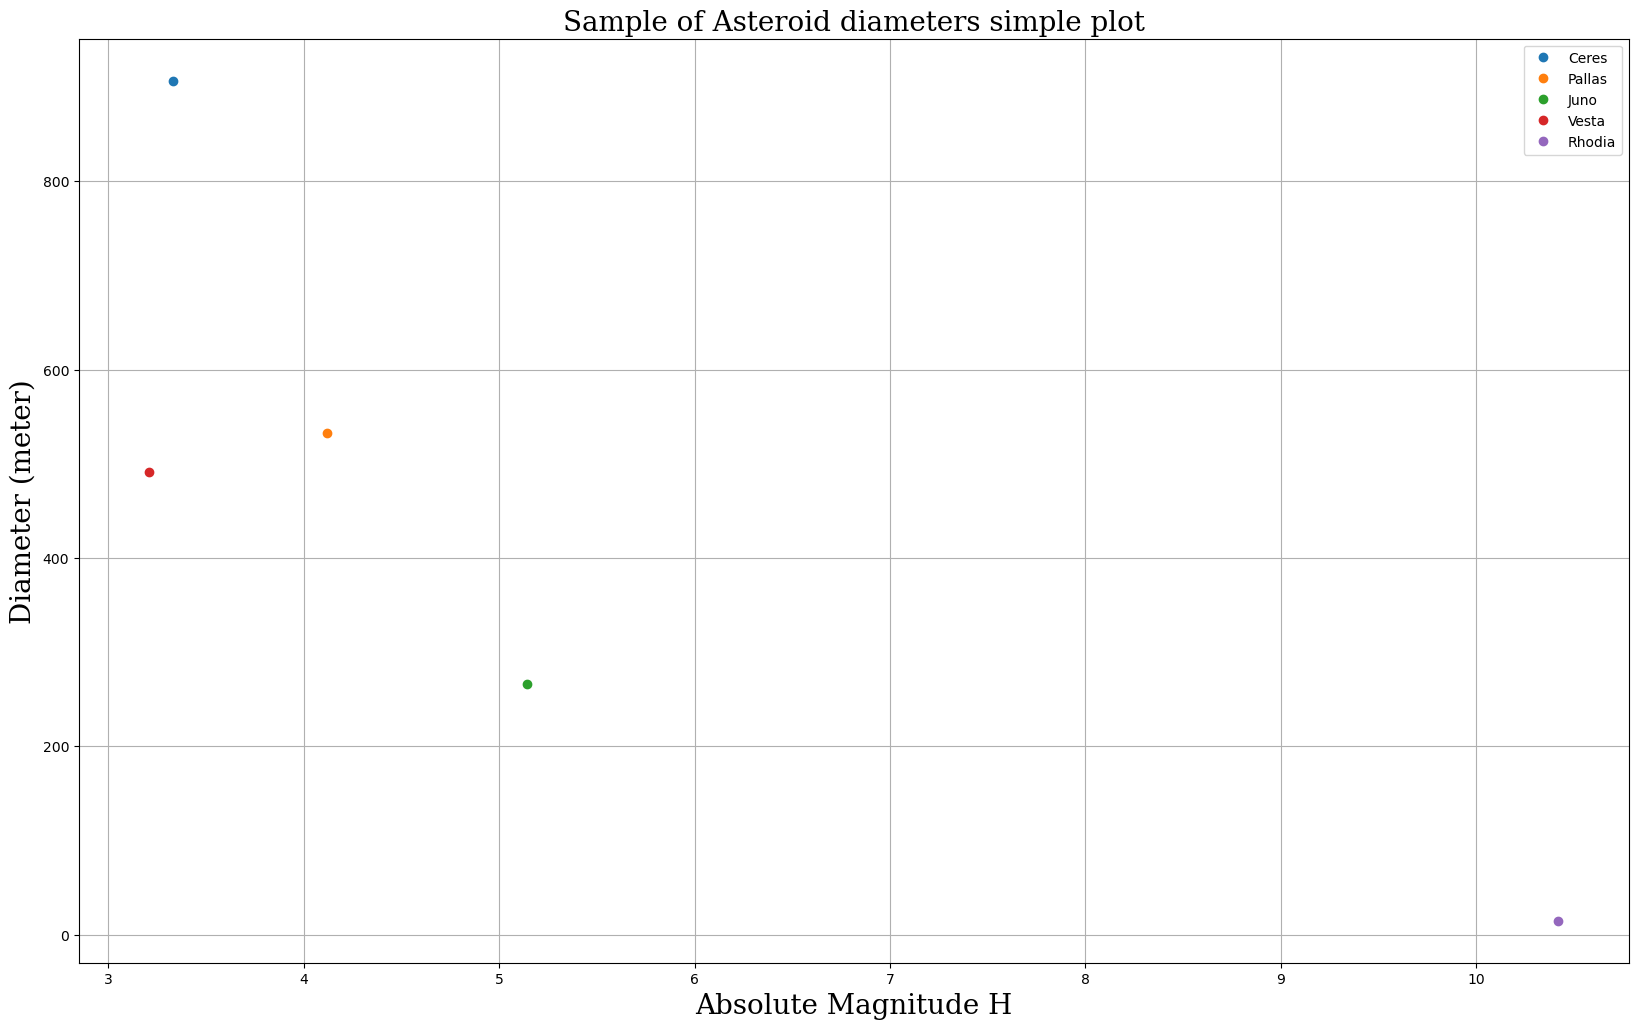

In [132]:
title='Sample of Asteroid diameters simple plot'


fig, ax = plt.subplots(figsize=(20, 12))
ax.grid()
ax.set_title(title, fontdict=font1)
plt.xlabel('Absolute Magnitude H', fontdict=font1)
plt.ylabel('Diameter (meter)', fontdict=font1)
for ast in asteroids:
    name = ast['name']
    h = ast['H']
    albedo = ast['albedo']
    dia = 1329 * 10**(-h/5) / (albedo**0.5)
    plt.plot(h, dia, 'o', label=name)
ax.legend(loc=0)
plt.show()

## Asteroid absolute magnitude from Minor Planet Center orbital elements
MPCORB.DAT file<br>
In this example elements text, the absolute value H = 10.42 is extracted from the string and displayed.<br>

In [131]:
elements='00437   10.42  0.15 K2289 223.73123   61.98037  263.18960    7.34265  0.2484870  0.26732970   2.3865539  0 E2022-N57  3761  42 1898-2022 0.56 M-v 3Ek MPCLINUX   0000    (437) Rhodia             20220706'
H = elements[8:13]
designation = elements[166:194]
print('designation', designation, 'H', H)


designation    (437) Rhodia              H 10.42


## Asteroid absolute magnitude, albedo, and diameter from JPL 

Link to Small-Body Database Lookup for object numbered 437:<br>
https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=437<br>
<pre>
437 Rhodia (A898 OA)
Classification: Main-belt Asteroid  
Parameter	            Value	Units	Sigma	Reference	Notes
[H] absolute magnitude	10.42			        MPO681829	IRAS observations used: 3 
diameter                13.373	km	    0.612	urn:nasa:pds:neowise_diameters_albedos::2.0[mainbelt]
geometric albedo        0.677		    0.100   urn:nasa:pds:neowise_diameters_albedos::2.0[mainbelt]
</pre>

Research<br>
Pravec, P., A.W. Harris, P. Kusnirak, A. Galad, K. Hornoch (2012). Absolute magnitudes of asteroids and a revision of asteroid albedo estimates from WISE thermal observations. Icarus Volume 221, Issue 1, September–October 2012, Pages 365-387, ISSN 0019-1035, http://dx.doi.org/10.1016/j.icarus.2012.07.026